##### Importing Packages

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

##### Loading the dataset

In [4]:
data = pd.read_csv("mushrooms.csv")

##### Look at the data / Data head

In [5]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

##### Preprocessing

In [8]:
# data['class'] = le.fit_transform(data['class'])
le = LabelEncoder()

In [9]:
data = data.apply(lambda x:le.fit_transform(x))

In [10]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [11]:
# Checking out the Class Column Counts
data['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

##### Loading Features and Target

In [12]:
X = data.iloc[:, 1:23].values  
y = data.iloc[:, 0].values

##### Split Train and Test Sets

In [13]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

##### Gini Index Metric

In [14]:
from sklearn.tree import DecisionTreeClassifier
# tree = DecisionTreeClassifier(criterion = 'gini', max_depth=5, min_samples_leaf=5).fit(X_train,y_train)
my_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=5).fit(X_train,y_train)

##### Predict Metric

In [15]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = my_tree.predict(X_test)
print(np.mean(y_pred != y_test)) # Error rate
print(confusion_matrix(y_test, y_pred)) # Confusion Matrix
print(classification_report(y_test, y_pred)) # Classification Report
print("The prediction accuracy is: ",my_tree.score(X_test,y_test)*100,"%")

0.018461538461538463
[[787  21]
 [  9 808]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       808
           1       0.97      0.99      0.98       817

   micro avg       0.98      0.98      0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

The prediction accuracy is:  98.15384615384616 %


##### Entropy Metric

In [16]:
# tree = DecisionTreeClassifier(criterion = 'entropy', max_depth=5, min_samples_leaf=5).fit(X_train,y_train)
my_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5).fit(X_train,y_train)

##### Prediction (Criteria = Entropy)

In [17]:
y_pred = my_tree.predict(X_test)
print(np.mean(y_pred != y_test)) # Error rate
print(confusion_matrix(y_test, y_pred)) # Confusion Matrix
print(classification_report(y_test, y_pred)) # Classification Report
print("The prediction accuracy is: ",my_tree.score(X_test,y_test)*100,"%")

0.021538461538461538
[[796  12]
 [ 23 794]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       808
           1       0.99      0.97      0.98       817

   micro avg       0.98      0.98      0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

The prediction accuracy is:  97.84615384615385 %


##### Visualization

<function matplotlib.pyplot.show(*args, **kw)>

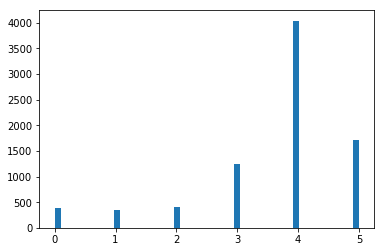

In [18]:
import matplotlib.pyplot as plt
plt.hist(data.population.values, bins='auto')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

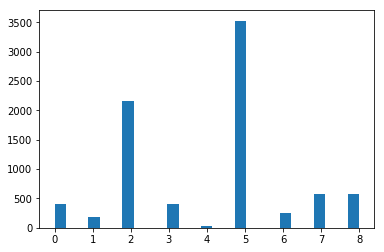

In [19]:
import matplotlib.pyplot as plt
plt.hist(data.odor.values, bins='auto')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

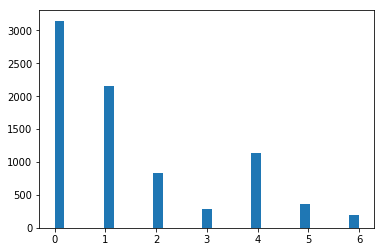

In [20]:
import matplotlib.pyplot as plt
plt.hist(data.habitat.values, bins='auto')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

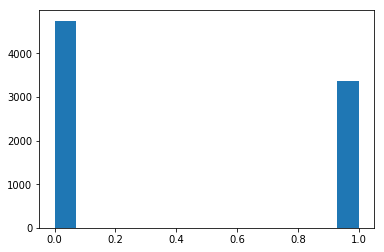

In [21]:
import matplotlib.pyplot as plt
plt.hist(data.bruises.values, bins='auto')
plt.show

In [22]:
# Grouping the data as per Class
data.groupby('class').count()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
0,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,...,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208
1,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,...,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916


##### Tree Visualization

In [23]:
from sklearn import tree
import collections
import pydotplus
import graphviz
data_feature_names = data.columns[1:23].values
dot_data = tree.export_graphviz(my_tree,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('output_data2.png')

True

In [24]:
# Feature Importance
my_tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.06184853,
       0.        , 0.        , 0.1433874 , 0.28442336, 0.        ,
       0.09756783, 0.        , 0.00960669, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.18628225,
       0.2128616 , 0.00402234])

In [25]:
# Feature Name
data_feature_names

array(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype=object)

No handles with labels found to put in legend.


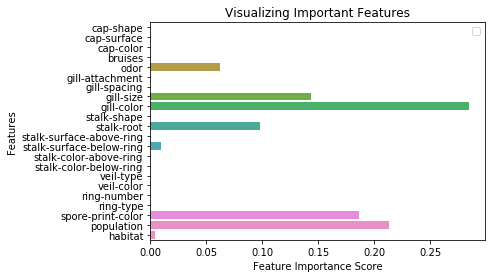

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=my_tree.feature_importances_, y=data_feature_names)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()